

# Project: Investigate the TMDb Movie Dataset for Popularity and Hit Patterns

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

DataSet's Key Characterstics
         
          1.Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
          2.Assuming the Budget_adj ,Revenue_adj columns are standardized (in one kind of currency,no need further relative conversations)
          

### Questions
        
        1.How some attritutes like release period ,genres can influence the movie's success a.k.a high revenue & profit  ?
           
           a.Do certain kind of genres has high profits than others ?. 
           b.Did releasing a movie on certain period like day of Week or Month has contributed to high profits in comparision to others ? 
       
       2.Are Popularity and Profits co-related attritubutes of Movie?.Is there any trend for movies to be popular but not so high on commerical success?

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.




In [17]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.


# Packages for Data analysis 

import numpy as np
import pandas as pd

# Packages for data Visualization and interactive plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from collections import defaultdict
import pprint

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Exploring the General Properties of the Data 

In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Loading the data as Dataframe

filename = 'tmdb-movies.csv'
tmdb_df = pd.read_csv(filename)

#Loaded Dataframe snapshot 
tmdb_df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
# Summary Statistics of Dataframe 
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (check for missing values and trim them ,making them ready for exploring)

#### Adding Columns - Profit ,Release day and Release Month

In [20]:
##Will be using Data variables from Columns -  Genre , Release month ,Profit ,Director to check the influences 
 # Hence the required columns will be constructed and trimmed for Null values


## Function to Get Release month  and Day of week data from Release_date and store in new columns
def get_release_month_day(df):
    df['release_month'] = pd.DatetimeIndex(df['release_date']).month
    df['release_day'] =  pd.DatetimeIndex(df['release_date']).dayofweek
    return df

#Calling func to get release month and day and store the values in dataframe
get_release_month_day(tmdb_df)


##Function to Get profit calculated from Revenue and Budget and store in new column

def calc_profit(df):
    df["Profit"] = (df["revenue_adj"] - df["budget_adj"])/100000 # Profits and conversion in Millions
    
    return df

#Calling func to get release month and day and store the values in dataframe
calc_profit(tmdb_df)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,Profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1,12544.459532
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2,2101.613532
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,2,1704.190699
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,1,17187.232108
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4,2,12109.488784
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,12,4,3661.143017
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,6,1,2627.551384
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,9,2,4483.896980
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,6,2,9961.120468
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,6,1,6244.116455


#### Trimming for Null Values

In [21]:
# Inspecting Columns for Zeros and replacing with NAN and then trimming them off for Columns
# Genres,Director ,Production Companies & Profit

tmdb_f = tmdb_df.replace(0,np.nan)
#tmdb_f = tmdb_df.replace({0:None})
tmdb_f.dropna(subset=['genres','production_companies','director','Profit'],inplace=True)


# Re-Checking the impact on Rows that are trimmed 

#Backup copy tmdb_df Data 
print ("Number of Rows & columns of Primary ", tmdb_df.shape)

#Active Copy tmdb_final Data 
print ("Number of Rows: {} & columns:{} after dropping null value rows ".format(*tmdb_f.shape))

Number of Rows & columns of Primary  (10866, 24)
Number of Rows: 5971 & columns:24 after dropping null value rows 


#### Checking  for Outliers 

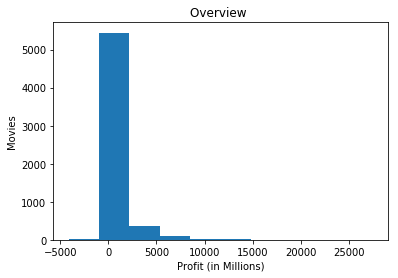

In [22]:
# Check for Outliers in Profit

prof_hist = tmdb_f['Profit'].plot.hist(bins=10)
prof_hist.set(xlabel = 'Profit (in Millions)',ylabel = 'Movies',Title ='Overview ')
plt.show()



### Dealing with Profit Outliers

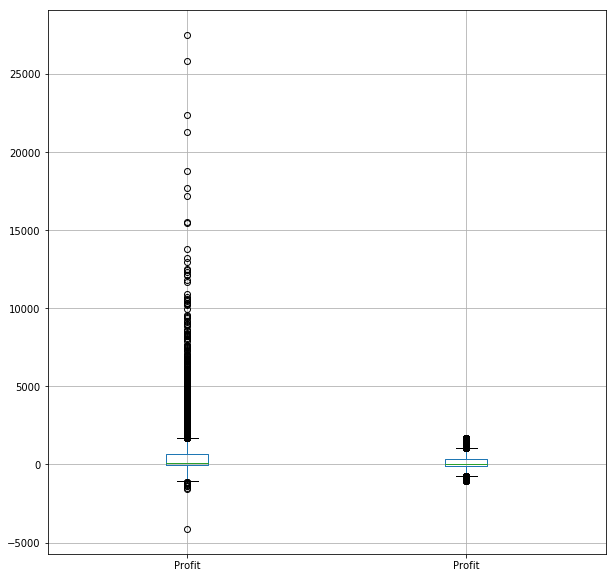

In [23]:
# Computing IQR
Q1 = tmdb_f['Profit'].quantile(0.25)
Q3 = tmdb_f['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
tmdb_profit = tmdb_f.query('(@Q1 - 1.5 * @IQR) <= Profit <= (@Q3 + 1.5 * @IQR)')


# Lets check the difference 
pd.concat([tmdb_f['Profit'].astype(float),tmdb_profit['Profit'].astype(float)],axis=1).boxplot(figsize = (10,10))



In [24]:
# Snapshot of Profit Central Tendency 

tmdb_profit['Profit'].describe()

count    5291.000000
mean      184.851044
std       461.745888
min     -1077.038983
25%       -70.202501
50%        18.123194
75%       370.278475
max      1686.938517
Name: Profit, dtype: float64

In [25]:
# Columns - Genres and Production Companies seperated with | , Construct them for better reading and parsing 

#Function to split Strings with delimiter '|' and store as array for better readality 

def str_split(df):
    df["prod_split"] = df["production_companies"].str.split('|')
    df["gn_split"] = df["genres"].str.split('|')
    return df

#Processing dataframe to construct Columns - Genres and Production Companies with split function
str_split(tmdb_profit)

#Final Inspection of DF
tmdb_profit.head()


/Users/divyareddy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/divyareddy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,Profit,prod_split,gn_split
11,76757,tt1617661,6.189369,176000003.0,183987723.0,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,http://www.jupiterascending.com,Lana Wachowski|Lilly Wachowski,Expand your universe.,...,1937,5.2,2015,1.619199e+08,1.692686e+08,2,2.0,73.486992,"[Village Roadshow Pictures, Dune Entertainment...","[Science Fiction, Fantasy, Action, Adventure]"
12,264660,tt0470752,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,http://exmachina-movie.com/,Alex Garland,There is nothing more human than the will to s...,...,2854,7.6,2015,1.379999e+07,3.391985e+07,1,2.0,201.198520,"[DNA Films, Universal Pictures International (...","[Drama, Science Fiction]"
13,257344,tt2120120,5.984995,88000000.0,243637091.0,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,http://www.pixels-movie.com/,Chris Columbus,Game On.,...,1575,5.8,2015,8.095996e+07,2.241460e+08,7,3.0,1431.860607,"[Columbia Pictures, Happy Madison Productions]","[Action, Comedy, Science Fiction]"
15,273248,tt3460252,5.898400,44000000.0,155760117.0,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,http://thehatefuleight.com/,Quentin Tarantino,No one comes up here without a damn good reason.,...,2389,7.4,2015,4.047998e+07,1.432992e+08,12,4.0,1028.192624,"[Double Feature Films, The Weinstein Company, ...","[Crime, Drama, Mystery, Western]"
20,158852,tt1964418,5.462138,190000000.0,209035668.0,Tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,http://movies.disney.com/tomorrowland,Brad Bird,Imagine a world where nothing is impossible.,...,1899,6.2,2015,1.747999e+08,1.923127e+08,5,1.0,175.128069,"[Walt Disney Pictures, Babieka, A113]","[Action, Family, Science Fiction, Adventure, M..."


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 -Do certain kind of genres has high profits than others ?

#### First ,Will get the count of Positive profits from total movies and check the distribution of Genres within the positive Profited Movies  to get the Sorted list of genres with highest Profits 


Total number of Movies : 5291
Number of Movies with Positive Profits : 3035 
defaultdict(<class 'int'>,
            {'Action': 675,
             'Adventure': 408,
             'Animation': 114,
             'Comedy': 1158,
             'Crime': 491,
             'Documentary': 71,
             'Drama': 1419,
             'Family': 282,
             'Fantasy': 240,
             'Foreign': 14,
             'History': 100,
             'Horror': 390,
             'Music': 110,
             'Mystery': 232,
             'Romance': 560,
             'Science Fiction': 322,
             'TV Movie': 1,
             'Thriller': 832,
             'War': 81,
             'Western': 35})


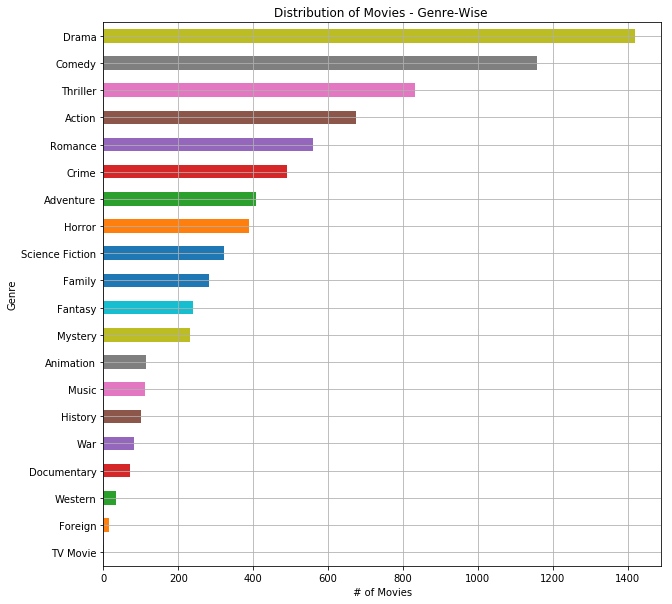

In [26]:
print ("Total number of Movies : {}".format(tmdb_profit['Profit'].count()))

profit_noprofit = (tmdb_profit['Profit'] > 0).value_counts()

print ("Number of Movies with Positive Profits : {} ".format(profit_noprofit[1]))


# Considering Postive Profited Movies and for genre wise distribution

top_movies_genres = tmdb_profit.nlargest(3000,'Profit')[['original_title','Profit','gn_split']]

# Parse the Genre column and count the success - genre wise

genre_count = defaultdict(int)
for row in top_movies_genres.gn_split:
    for cnt in row:
        genre_count[cnt] += 1

# Using Pretty Print for Dictionary output       
pprint.pprint(genre_count)

# Plot the Sorted Distribution

df = pd.Series(dict(genre_count),name='Genre Distribution')
df = df.sort_values(ascending=True)
df.index.name='Genre'
graph_df = df.plot(kind='barh',grid=True,title='Distribution of Movies - Genre-Wise ',figsize=(10,10),fontsize=10)
graph_df.set(xlabel=' # of Movies ')

plt.show()

#### Findings : 

Drama ,Comedy , Thriller ,Action Genres are top and highest grossers anytime ,Drama is seen to have largest share of ~47%

### Research Question 2 - Did releasing a movie on certain period like day of Week or Month has contributed to high profits in comparision to others ? 

#### Checking the distribution of movies w.r.t release-day to know whether distribution is uniform or high on some days 

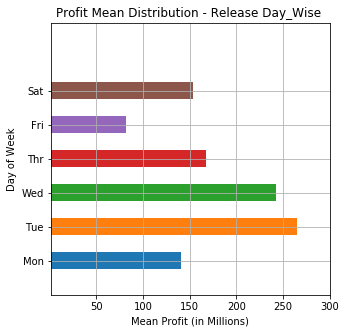

In [27]:
# Lets group the data by release Period ( Day of the Week) to further analyse 

movies_releaseweek = tmdb_profit.groupby('release_day').mean()['Profit']

graph_df=movies_releaseweek.plot(kind='barh',grid=True,title='Profit Mean Distribution - Release Day_Wise ',legend=False,figsize=(5,5))
graph_df.set(xlabel='Mean Profit (in Millions)',ylabel='Day of Week',ylim=(-1,7),xlim=(1,300))
graph_df.set(yticklabels = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])

# Pie Chart 
#graph_df=movies_releaseweek.plot(kind='pie',labels = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun'],title='Profit Mean Distribution - Release Day_Wise ',autopct='%1.1f%%',legend=False,figsize=(5,5))
plt.show()


Findings : 

Movies which are released on Tuesdays and Mondays has best profits with next bets on Saturday , 
  Surpising that Week days with high profits ? and there is no data for sunday releases .

#### Checking the distribution of movies w.r.t release month to know whether distribution is uniform or high on certain months

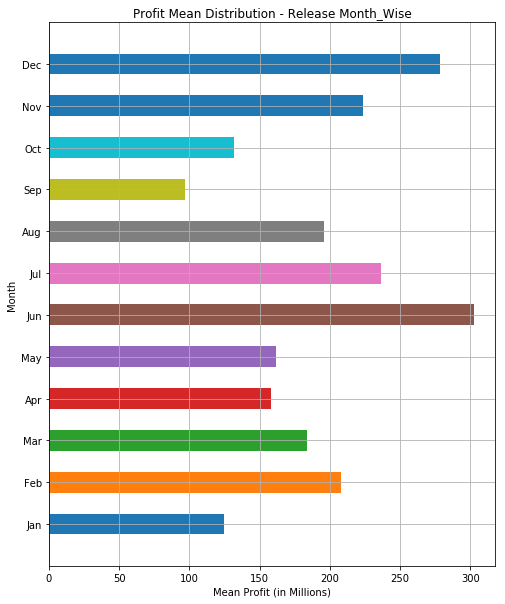

In [28]:
# Lets group the data by release Period ( Month) to further analyse 
movies_releaseMonth = tmdb_profit.groupby('release_month').mean()['Profit']

graph_df=movies_releaseMonth.plot(kind='barh',grid=True,title='Profit Mean Distribution - Release Month_Wise',legend=False,figsize=(8,10))
graph_df.set(xlabel='Mean Profit (in Millions)',ylabel='Month',ylim=(-1,12))
graph_df.set(yticklabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()


Findings : 

Movies which are also released in Jun are seen to have highesy hit ratio ,Can this be attributed to Holiday season ?

### Research Question 3  - Are Popularity and Profits co-related attritubutes of Movie?

#### Co-Relating the Variables Popularity and Profit to check if they are related and impact each other in same direction or different 

In [29]:
# Correlate the variables Popularity and Profit 

print (np.corrcoef(tmdb_profit['popularity'],tmdb_profit['Profit']))


[[1.         0.36920589]
 [0.36920589 1.        ]]


Findings : 
With 0.37 Correlation cofficient ,Though Popularity and Profitablity of a movie are related and proportional .However not something strong as its much less than pearson's r 

<a id='conclusions'></a>
## Conclusions


1. Movies like Genres - Drama ,Comedy ,Thriller are more profitable than others .This may attritubute to People's interests  
2. Movies released in Month of Jun and Dec has grossed with great mean profits of ~ 250 Millions+ ,while Jan and Sept are at lowest. This may be because of holiday season that increased people's frequency to cinemas
3. Movies released on Tuesday has mean profits of 250+ Million which is greater than weekend releases .

As limitations ,I wish to have had atleast two more variables like director's ratings or Cast ratings , Revenue data of  Countries  to understand the combined influence of variables . Thus might have helped me to derive strong analysis of which data attritubutes can heavily influence movie's Profits 

Overall, Movie success can depend on multiple variables like Genres,Time of Release ,Additional Parameters like Rating of Directors ,Production Houses  and Casts can help in further analysis  